In [3104]:
import pickle as pkl
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3105]:
#f = open('collected_data_all_cpu.pkl', 'rb')
names = ['front-end', 'user', 'catalogue', 'orders', 'carts', 'payment', 'shipping']
metrics = ['ctn_latency', 'ctn_cpu', 'ctn_mem', 'ctn_write', 'ctn_read', 'ctn_net_in', 'ctn_net_out']
#metrics = ['ctn_cpu', 'ctn_mem', 'ctn_write', 'ctn_read', 'ctn_net_in', 'ctn_net_out']
idx = 2
f = open('./data_collected/latency1_'+names[idx]+'.pkl', 'rb')
data = pkl.load(f)
data

,front-end_ctn_latency,front-end_ctn_cpu,front-end_ctn_mem,front-end_ctn_net_in,front-end_ctn_net_out,user_ctn_latency,user_ctn_cpu,user_ctn_mem,user_ctn_write,user_ctn_net_in,...,carts_ctn_net_out,payment_ctn_latency,payment_ctn_cpu,payment_ctn_net_in,payment_ctn_net_out,shipping_ctn_latency,shipping_ctn_cpu,shipping_ctn_mem,shipping_ctn_net_in,shipping_ctn_net_out
0,0.001381,0.999875,0.873343,0.993674,1.000000,0.960688,0.883850,0.0,0.916228,0.786007,...,0.987351,0.068917,0.986295,0.988808,0.996189,0.415507,1.000000,0.0,0.976317,0.970285
1,0.000531,0.999875,0.873343,1.000000,0.999766,0.968404,1.000000,0.0,0.877945,1.000000,...,0.812008,0.079251,1.000000,0.988808,0.996189,0.543690,0.893676,0.0,1.000000,1.000000
2,0.001358,1.000000,1.000000,1.000000,0.999766,1.000000,0.912487,0.0,0.877945,1.000000,...,1.000000,0.000000,1.000000,0.757428,0.735668,0.531585,0.991871,1.0,1.000000,1.000000
3,0.000000,0.999554,1.000000,1.000000,0.999766,0.940402,0.997225,0.0,0.877945,1.000000,...,0.993886,0.016898,0.992891,0.998044,0.999232,0.531610,0.963564,1.0,0.954063,0.934502
4,0.002138,0.986302,0.873343,0.965518,0.977064,0.928588,0.839272,0.0,1.000000,0.955748,...,0.993886,0.037365,0.739091,1.000000,1.000000,0.576458,0.933341,1.0,0.954063,0.934502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.987797,0.047576,0.103368,0.077985,0.133200,0.165814,0.024455,1.0,0.000000,0.072457,...,0.054957,0.792161,0.028286,0.048569,0.074352,0.654477,0.085665,1.0,0.045107,0.051223
57,0.988253,0.046025,0.087245,0.076104,0.118220,0.166356,0.021099,1.0,0.482904,0.072457,...,0.058271,0.857332,0.074572,0.048569,0.074352,0.562258,0.019867,1.0,0.028515,0.034043
58,0.990771,0.024971,0.087245,0.076104,0.118220,0.126574,0.021099,1.0,0.482904,0.072457,...,0.058271,0.856838,0.079689,0.049887,0.078702,0.539665,0.075014,1.0,0.028515,0.034043
59,0.990331,0.043624,0.101935,0.028757,0.054309,0.168527,0.020740,1.0,0.458309,0.073145,...,0.054675,0.843349,0.079689,0.049196,0.085347,0.498396,0.074214,1.0,0.016525,0.017366


In [3106]:
data.columns

Index(['front-end_ctn_latency', 'front-end_ctn_cpu', 'front-end_ctn_mem',
       'front-end_ctn_net_in', 'front-end_ctn_net_out', 'user_ctn_latency',
       'user_ctn_cpu', 'user_ctn_mem', 'user_ctn_write', 'user_ctn_net_in',
       'user_ctn_net_out', 'catalogue_ctn_latency', 'catalogue_ctn_cpu',
       'catalogue_ctn_mem', 'catalogue_ctn_net_in', 'catalogue_ctn_net_out',
       'orders_ctn_latency', 'orders_ctn_cpu', 'orders_ctn_mem',
       'orders_ctn_write', 'orders_ctn_net_in', 'orders_ctn_net_out',
       'carts_ctn_latency', 'carts_ctn_cpu', 'carts_ctn_write',
       'carts_ctn_net_in', 'carts_ctn_net_out', 'payment_ctn_latency',
       'payment_ctn_cpu', 'payment_ctn_net_in', 'payment_ctn_net_out',
       'shipping_ctn_latency', 'shipping_ctn_cpu', 'shipping_ctn_mem',
       'shipping_ctn_net_in', 'shipping_ctn_net_out'],
      dtype='object')

In [3107]:
name=[]
for i in metrics:
    n = names[idx]+'_'+i
    try:
        if len(data[[n]]) != 0 :
            name.append(n)
    except:
        print(n)        
service_metric = data[name]
service_metric

catalogue_ctn_write
catalogue_ctn_read


,catalogue_ctn_latency,catalogue_ctn_cpu,catalogue_ctn_mem,catalogue_ctn_net_in,catalogue_ctn_net_out
0,0.000098,0.990500,0.0,0.984405,0.985303
1,0.000036,1.000000,0.0,0.988291,0.989480
2,0.000029,0.997057,0.0,0.988291,0.989480
3,0.000000,0.903367,0.0,0.989397,0.989899
4,0.005493,0.987541,0.0,0.989397,0.989899
...,...,...,...,...,...
56,0.927597,0.033144,1.0,0.089190,0.091862
57,0.924479,0.033144,1.0,0.087026,0.088961
58,0.911285,0.000000,1.0,0.087582,0.088010
59,0.907713,0.022371,1.0,0.087582,0.088010


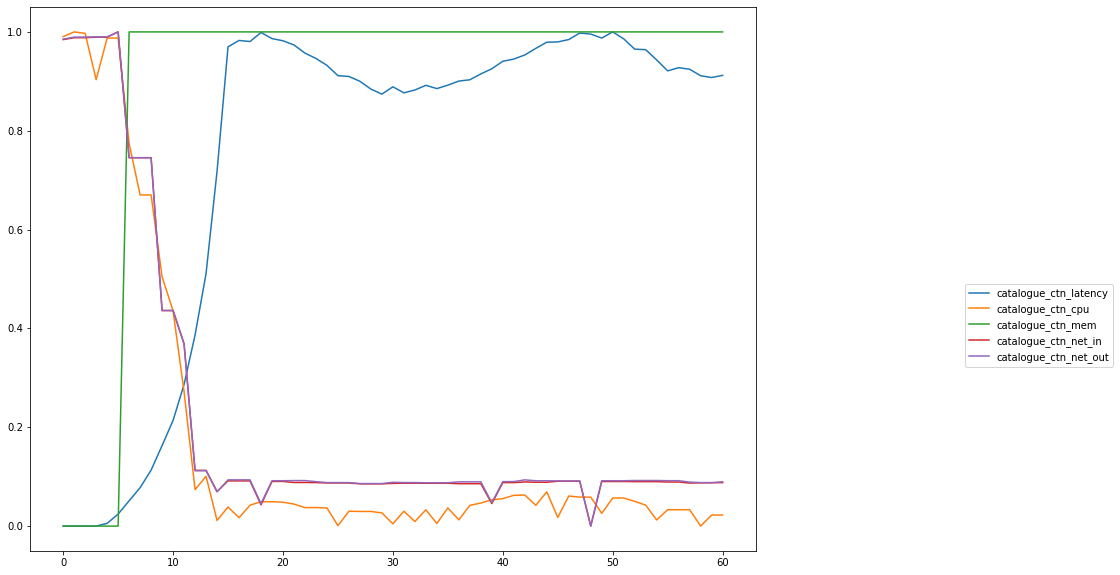

In [3108]:
m = list(service_metric.columns)
plt.figure(figsize=(13,10))
for each in m:
    plt.plot(service_metric[each], label=str(each))
plt.legend(bbox_to_anchor=(1.5,0.5))
plt.show()

In [3109]:
X = service_metric

## PC

  0%|          | 0/5 [00:00<?, ?it/s]

PC result
[[ 0  0 -1  0  0]
 [ 0  0  0  0  0]
 [-1  0  0  0  0]
 [ 0  0  0  0 -1]
 [ 0  0  0 -1  0]]
[0, 2, 3, 4]
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


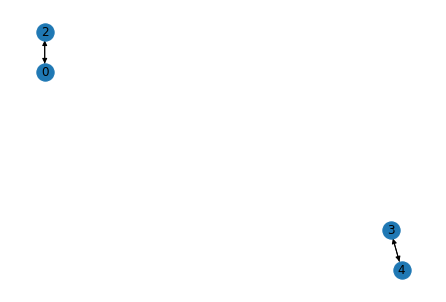

In [3110]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import chisq, fisherz, gsq, kci, mv_fisherz

cg = pc(X.to_numpy(), 0.05, fisherz, False, 0, -1)
adj = cg.G.graph

print('PC result')
print(adj)

# Change the adj to graph
G = nx.DiGraph()
for i in range(len(adj)):
    for j in range(len(adj)):
        if adj[i,j] == -1:
            G.add_edge(i,j)
        if adj[i,j] == 1:
            G.add_edge(j,i)
nodes = sorted(G.nodes())
print(nodes)
adj = np.asarray(nx.to_numpy_matrix(G, nodelist=nodes))
print(adj)
nx.draw(G, with_labels=True)

In [3111]:
# PageRank
from sknetwork.ranking import PageRank
pagerank = PageRank()
scores = pagerank.fit_transform(adj.T)
print(scores)
#cmap = plt.cm.coolwarm

score_dict = {}
for i,s in enumerate(scores):
    score_dict[i] = s
print(sorted(score_dict.items(), key=lambda item:item[1], reverse=True))

[0.25 0.25 0.25 0.25]
[(0, 0.25), (1, 0.25), (2, 0.25), (3, 0.25)]


## GES

x0
x1
x2
x3
x4
[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  1]
 [ 0  0  0 -1  0]]
x0
x1
x2
x3
x4
x3
[[ 0  0  0  0  0]
 [ 0  0  0  0 -1]
 [ 0  0  0  0  0]
 [ 0  0  0  0 -1]
 [ 0  1  0 -1  0]]
x0
x1
x2
x3
x4
x3
[[ 0  0  0 -1  0]
 [ 0  0  0  0 -1]
 [ 0  0  0  0  0]
 [ 1  0  0  0 -1]
 [ 0 -1  0 -1  0]]
x0
x1
x2
x3
x4
x1
[[ 0  0  0 -1  0]
 [ 0  0  0  0 -1]
 [ 0  0  0  0  1]
 [-1  0  0  0 -1]
 [ 0 -1 -1 -1  0]]
x0
x1
x2
x3
x4
x0
x1
x2
x3
x0
[[ 0  0  0 -1  1]
 [ 0  0  0  0 -1]
 [ 0  0  0  0 -1]
 [-1  0  0  0 -1]
 [-1 -1 -1 -1  0]]
x0
x1
x2
x3
x4
x0
x1
x2
x3
x0
[[ 0  1  0 -1 -1]
 [-1  0  0  0 -1]
 [ 0  0  0  0 -1]
 [-1  0  0  0 -1]
 [-1 -1 -1 -1  0]]
x0
x1
x2
x3
x4
x0
x2
x3
x4
x2
x3
backward
[[ 0 -1  0 -1  0]
 [ 1  0  0  0  1]
 [ 0  0  0  0 -1]
 [-1  0  0  0 -1]
 [ 0 -1 -1 -1  0]]
x0
x1
x2
x3
x4
x0
x1
x2
[[ 0  0  0 -1  0]
 [ 0  0  0  0  1]
 [ 0  0  0  0 -1]
 [-1  0  0  0 -1]
 [ 0 -1 -1 -1  0]]
x0
x1
x2
x3
x4
x0
x1
x2
x3
x0
[0, 1, 2, 3, 4]
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0.

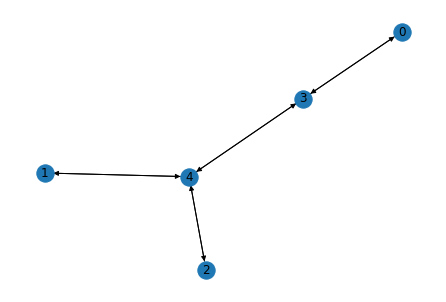

In [3112]:
from causallearn.search.ScoreBased.GES import ges

#X = data.iloc[:,1:]
X = X - np.tile(np.mean(X, axis=0), (X.shape[0], 1))
X = np.dot(X, np.diag(1 / np.std(X, axis=0)))
maxP = 5  # maximum number of parents when searching the graph
parameters = {'kfold': 10, 'lambda': 0.01}
#X = X[:50, :]
Record = ges(X, 'local_score_CV_general', maxP=maxP, parameters=parameters)
adj = Record['G'].graph

# Change the adj to graph 
G = nx.DiGraph()
for i in range(len(adj)):
    for j in range(len(adj)):
        if adj[i,j] == -1:
            G.add_edge(i,j)
        if adj[i,j] == 1:
            G.add_edge(j,i)
nodes = sorted(G.nodes())
print(nodes)
adj = np.asarray(nx.to_numpy_matrix(G, nodelist=nodes))
print(adj)
nx.draw(G, with_labels=True)

In [3113]:
# PageRank
from sknetwork.ranking import PageRank
pagerank = PageRank()
scores = pagerank.fit_transform(adj.T)
print(scores)
#cmap = plt.cm.coolwarm

score_dict = {}
for i,s in enumerate(scores):
    score_dict[i] = s
print(sorted(score_dict.items(), key=lambda item:item[1], reverse=True))

[0.12988314 0.13586787 0.13586787 0.25446353 0.34391759]
[(4, 0.3439175925336885), (3, 0.25446353356271056), (1, 0.13586786801267792), (2, 0.13586786801267792), (0, 0.12988313787824513)]


## ICA-LINGAM

In [3114]:
from causallearn.search.FCMBased import lingam
#model = lingam.DirectLiNGAM()
model = lingam.ICALiNGAM()
model.fit(X)

print('LiNGAM result')
print(model.causal_order_) # the later virable is unable to cause the former virable
#print(model.adjacency_matrix_)

# Acutal matrix: row points to col 
adj = model.adjacency_matrix_.T 
# For PageRank, should adj.T
print(adj)

LiNGAM result
[3, 1, 4, 0, 2]
[[ 0.          0.         -0.74358624  0.          0.        ]
 [-0.46071425  0.         -0.62678378  0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [-0.47618622  0.99450923 -0.92301354  0.          0.99990184]
 [ 0.          0.          0.          0.          0.        ]]


In [ ]:
org_G = nx.from_numpy_matrix(adj, parallel_edges=True, create_using=nx.DiGraph)
pos=nx.circular_layout(org_G)
nx.draw(org_G, pos=pos, with_labels=True)

In [ ]:
# PageRank
from sknetwork.ranking import PageRank
pagerank = PageRank()
scores = pagerank.fit_transform(np.abs(adj.T))
print(scores)
#cmap = plt.cm.coolwarm

score_dict = {}
for i,s in enumerate(scores):
    score_dict[i] = s
print(sorted(score_dict.items(), key=lambda item:item[1], reverse=True))